<a href="https://colab.research.google.com/github/RisalahNaufal/DATA-MINING_Algoritma-Apriori-Association-Rule/blob/main/Market_Basket_Optimisation_Association_Learning_(008).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rule Learning Model
<br>
<i><u>
Ada 7501 transaksi dari sebuah Toko Komoditas ternama. Kita harus menemukan Pasangan Terbaik untuk penawaran Beli 1 Gratis 1, yang akan diberikan oleh Pemilik Toko. Jadi di sini saya telah menggunakan Model APRIORI berdasarkan nilai lift yang sesuai <br>
(Support, Confidence, Lift) threshold values.</i></u>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install apyori

<h1><b><i>Loading Data</i><b></h1>

In [ ]:
df=pd.read_csv("Market_Basket_Optimisation.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1><b><i>Data Preprocessing</i><b></h1>

In [ ]:
x=df.iloc[:,:].values
lis=[]
count=0
for i in x:
    lis.append([str(y) for y in i])


In [ ]:
from apyori import apriori
assosiation=apriori(transactions=lis,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)
confidence=[]
lift=[]
support=[]
base_item=[]
dependent_item=[]
for sub in assosiation:
    lift.append(sub[2][0][3])
    confidence.append(sub[2][0][2])
    support.append(sub[1])
    base_item.append(list(sub[2][0][0])[0])
    dependent_item.append(list(sub[2][0][1])[0])
data=zip(base_item,dependent_item,support,confidence,lift)

<h1><b><i>Making a Data Frame</i><b></h1>

In [ ]:
df2=pd.DataFrame(columns=["Base_Item","Dependent_Item","Support","Confidence","Lift"])

In [ ]:
list2=[list(i) for i in data]

In [ ]:
j=0
for z in list2:
    df2.loc[j]=z
    j=j+1
df2

,Base_Item,Dependent_Item,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


<h3><b><i>
Berikut adalah Urutan Terurut dari Pasangan Barang Terbaik (Untuk Beli 1 Gratis 1).</h3></b></i>

In [ ]:
df2.sort_values(by="Lift",ascending=False,ignore_index=True)

,Base_Item,Dependent_Item,Support,Confidence,Lift
0,fromage blanc,honey,0.003333,0.245098,5.164271
1,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
3,pasta,shrimp,0.005066,0.322034,4.506672
4,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
7,herb & pepper,ground beef,0.015998,0.323450,3.291994
8,light cream,olive oil,0.003200,0.205128,3.114710


*Berdasarkan nilai Lift mereka (Threeshold=3.00)*

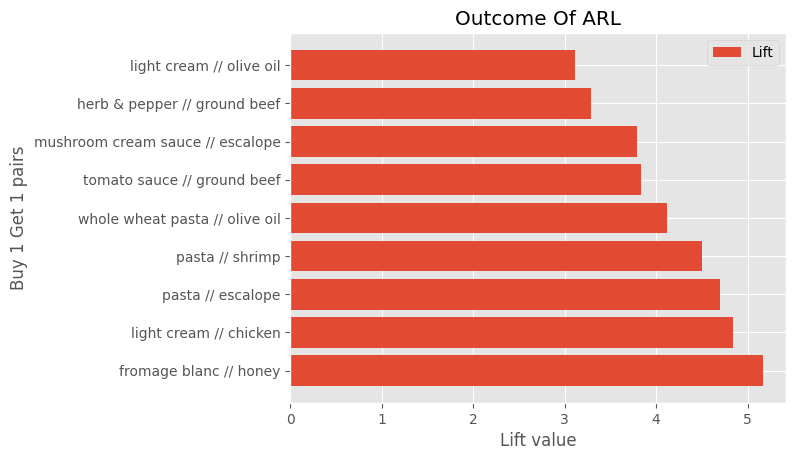

<Figure size 1300x1000 with 0 Axes>

In [ ]:
Base_Item=df2.sort_values(by="Lift",ascending=False,ignore_index=True)["Base_Item"]
Dependent_Item=df2.sort_values(by="Lift",ascending=False,ignore_index=True)["Dependent_Item"]
pair=[]
for i in range(len(df2)):
    pair.append(Base_Item[i]+" // "+Dependent_Item[i])
Lift=df2.sort_values(by="Lift",ascending=False,ignore_index=True)["Lift"]
plt.style.use("ggplot")
plt.barh(pair,Lift,label="Lift")
plt.xlabel("Lift value")
plt.ylabel("Buy 1 Get 1 pairs")
plt.title("Outcome Of ARL")
plt.legend()
plt.figure(figsize=(13,10))
plt.show()

*Berdasar nilai confidence*

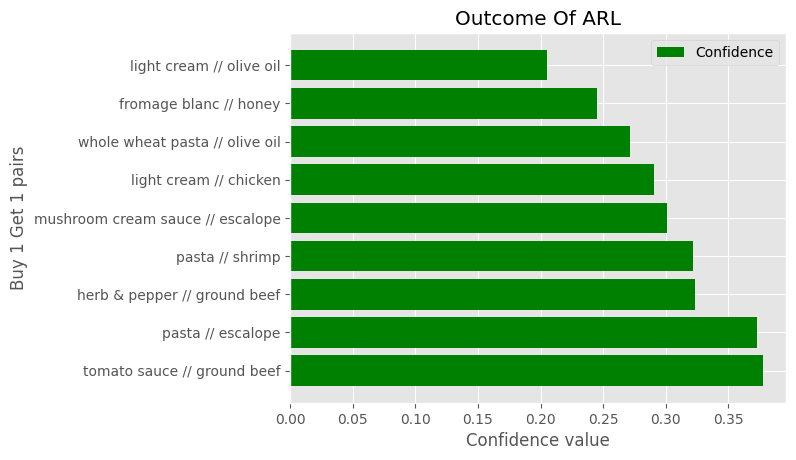

<Figure size 1300x1000 with 0 Axes>

In [ ]:
Base_Item=df2.sort_values(by="Confidence",ascending=False,ignore_index=True)["Base_Item"]
Dependent_Item=df2.sort_values(by="Confidence",ascending=False,ignore_index=True)["Dependent_Item"]
pair=[]
for i in range(len(df2)):
    pair.append(Base_Item[i]+" // "+Dependent_Item[i])
Confidence=df2.sort_values(by="Confidence",ascending=False,ignore_index=True)["Confidence"]
plt.style.use("ggplot")
plt.barh(pair,Confidence,label="Confidence",color="green")
plt.xlabel("Confidence value")
plt.ylabel("Buy 1 Get 1 pairs")
plt.title("Outcome Of ARL")
plt.legend()
plt.figure(figsize=(13,10))
plt.show()

*Berdasar nilai support*

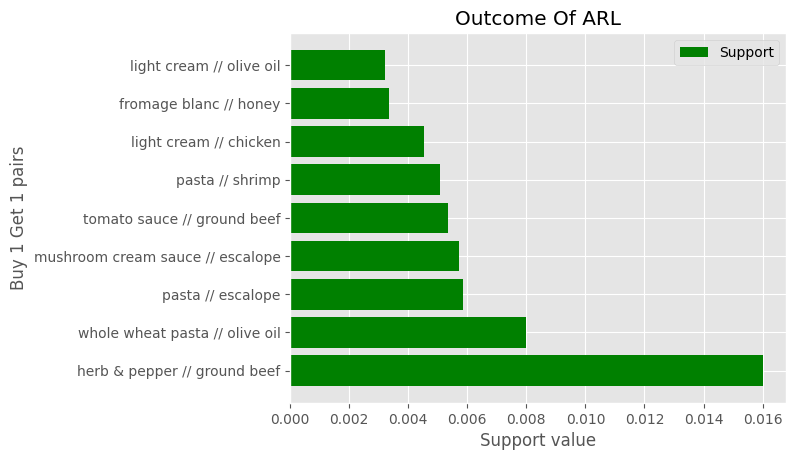

<Figure size 1300x1000 with 0 Axes>

In [ ]:
Base_Item=df2.sort_values(by="Support",ascending=False,ignore_index=True)["Base_Item"]
Dependent_Item=df2.sort_values(by="Support",ascending=False,ignore_index=True)["Dependent_Item"]
pair=[]
for i in range(len(df2)):
    pair.append(Base_Item[i]+" // "+Dependent_Item[i])
Support=df2.sort_values(by="Support",ascending=False,ignore_index=True)["Support"]
plt.style.use("ggplot")
plt.barh(pair,Support,label="Support",color="green")
plt.xlabel("Support value")
plt.ylabel("Buy 1 Get 1 pairs")
plt.title("Outcome Of ARL")
plt.legend()
plt.figure(figsize=(13,10))
plt.show()

<h3>
Ini adalah solusi paling bagus yang bisa diterapkan pemilik toko
</h3>

#BILA BATAS NILAI CONFIDENCE DAN SUPPORT = 0.7

In [ ]:
x=df.iloc[:,:].values
lis=[]
count=0
for i in x:
    lis.append([str(y) for y in i])

In [ ]:
from apyori import apriori
assosiation=apriori(transactions=lis,min_support=0.7,min_confidence=0.7,min_lift=3,min_length=2,max_length=2)
confidence=[]
lift=[]
support=[]
base_item=[]
dependent_item=[]
for sub in assosiation:
    lift.append(sub[2][0][3])
    confidence.append(sub[2][0][2])
    support.append(sub[1])
    base_item.append(list(sub[2][0][0])[0])
    dependent_item.append(list(sub[2][0][1])[0])
data=zip(base_item,dependent_item,support,confidence,lift)

In [ ]:
df2=pd.DataFrame(columns=["Base_Item","Dependent_Item","Support","Confidence","Lift"])

In [ ]:
list2=[list(i) for i in data]

In [ ]:
j=0
for z in list2:
    df2.loc[j]=z
    j=j+1
df2

,Base_Item,Dependent_Item,Support,Confidence,Lift
